<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <h1 style="font-size: 36px; color: #ebf1ff;">Predicting Overall Beer Ratings: A Data Science Case Study</h1>
        <div style="display: flex; justify-content:center; align-items:center">
            <div style="text-align:left">
                <p style="font-size: 18px; color: #ebf1ff;">In this notebook, we will analyze the data on Beer Ratings to predict the overall rating of a beer based user reviews and user demographics.</p>
                <p style="font-size: 18px; color: #ebf1ff;">We will use a dataset that contains information about beers, including their style, ABV, IBU, and overall rating. We will use this data to train a model that can predict the overall rating of a beer based on its characteristics. We will use a combination of data preprocessing, feature engineering, and machine learning algorithms to achieve this goal. We will also use techniques such as cross-validation and hyperparameter tuning to ensure that our model is robust and accurate.</p>
                <p style="font-size: 18px; color: #ebf1ff;">Finally, we will evaluate the performance of our model using metrics such as mean absolute error and R-squared.</p>
            </div>
            <img src="./assets/lager.png" alt="beer" style="width: 300px; height: 200px;">
        </div>
    </div>
</center>

<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 240px; width: max-content; border-radius: 12px">
    Importing Libraries
    </h2>
  </center>
</div>


In [36]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import spacy
from textblob import TextBlob
from tqdm import tqdm
import datetime
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 240px; width: max-content; border-radius: 12px">All About the Data</h2>
  </center>
</div>

<center>
    <p style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
    We will begin by loading the dataset and examining its structure. Next, we will conduct exploratory data analysis to gain deeper insights into the data. Following this, we will clean and preprocess the dataset to ensure it is well-prepared for modeling.</p>
</center>


In [204]:
df=pd.read_csv("./train.csv")
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


<center>
  <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
    <div style="padding: 20px; font-family: Arial, sans-serif">
        <h2 style="
        background-color: #0E182F;
        width:max-content;
        padding: 12px 24px;
        border-radius:12px;
        text-align: center;
        color: #ebf1ff;">Data Attributes Overview</h2>
        <table style="width: 72%; border-collapse: collapse;">
          <thead>
            <tr>
              <th style="background-color: #0E182F; color: #ebf1ff; padding: 10px; text-align: left;">Attribute</th>
              <th style="background-color: #0E182F; color: #ebf1ff; padding: 10px; text-align: left;">Description</th>
            </tr>
          </thead>
          <tbody style="color:#ebf1ff">
            <tr>
              <td><strong>Index</strong></td>
              <td>An identifier for the review.</td>
            </tr>
            <tr>
              <td><strong>beer/ABV</strong></td>
              <td>The alcohol by volume (ABV) of the beer.</td>
            </tr>
            <tr>
              <td><strong>beer/beerId</strong></td>
              <td>A unique ID indicating the beer reviewed.</td>
            </tr>
            <tr>
              <td><strong>beer/brewerId</strong></td>
              <td>A unique ID indicating the brewery.</td>
            </tr>
            <tr>
              <td><strong>beer/name</strong></td>
              <td>The name of the beer.</td>
            </tr>
            <tr>
              <td><strong>beer/style</strong></td>
              <td>The style/category of the beer (e.g., IPA, Stout, etc.).</td>
            </tr>
            <tr>
              <td><strong>review/appearance</strong></td>
              <td>Rating of the beer's appearance (1.0 to 5.0).</td>
            </tr>
            <tr>
              <td><strong>review/aroma</strong></td>
              <td>Rating of the beer's aroma (1.0 to 5.0).</td>
            </tr>
            <tr>
              <td><strong>review/overall</strong></td>
              <td>Overall rating of the beer (1.0 to 5.0).</td>
            </tr>
            <tr>
              <td><strong>review/palate</strong></td>
              <td>Rating of the beer's palate (1.0 to 5.0).</td>
            </tr>
            <tr>
              <td><strong>review/taste</strong></td>
              <td>Rating of the beer's taste (1.0 to 5.0).</td>
            </tr>
            <tr>
              <td><strong>review/text</strong></td>
              <td>The text content of the review, describing the user’s experience.</td>
            </tr>
            <tr>
              <td><strong>review/timeStruct</strong></td>
              <td>A dictionary specifying when the review was submitted (e.g., year, month, day).</td>
            </tr>
            <tr>
              <td><strong>review/timeUnix</strong></td>
              <td>The Unix timestamp when the review was submitted.</td>
            </tr>
            <tr>
              <td><strong>user/ageInSeconds</strong></td>
              <td>Age of the user in seconds, used for demographic analysis.</td>
            </tr>
            <tr>
              <td><strong>user/birthdayRaw</strong></td>
              <td>The raw birthday date (e.g., "YYYY-MM-DD").</td>
            </tr>
            <tr>
              <td><strong>user/birthdayUnix</strong></td>
              <td>The Unix timestamp of the user's birthday.</td>
            </tr>
            <tr>
              <td><strong>user/gender</strong></td>
              <td>Gender of the user (if specified, otherwise may be missing).</td>
            </tr>
            <tr>
              <td><strong>user/profileName</strong></td>
              <td>The profile name of the user who submitted the review.</td>
            </tr>
          </tbody>
        </table>
        <div style="background-color: transparent; color: #ebf1ff; font-family: Arial, sans-serif; padding: 20px; width:92%" >
          <ul style="list-style-type: none; padding-left: 0; text-align:left">
            <li><strong>The dataset consists:</strong> 37,500 entries of reviews/ratings based on various factors like appearance, aroma, taste, and palette.</li>
            <li><strong>Target variable:</strong> review/overall given by the user.</li>
            <li><strong>Data types:</strong> Categorical (e.g., beer/name, beer/style, review/text, user/gender) and Numerical (e.g., beer/ABV, user/ageInSeconds, review ratings).</li>
            <li><strong>Ratings scale:</strong> 1-5.</li>
      </ul>
      <h3 style="text-align: center; color: #52CBC3;">Distribution of Review Ratings Across Categories</h3>
      <img src="./assets/out.ratings_kde.png" alt="Distribution of Review Ratings Across Categories" style="display: block; margin-left: auto; margin-right: auto;">
      <p style="text-align: center; color: #EE5622; font-size: 16px;">The graph shows Kernel Density Estimation (KDE) plots for the distribution of ratings across four categories—Appearance, Aroma, Palate, and Taste—along with an overall review distribution. The peaks of each plot indicate the most frequent ratings, with the overall review plot providing a summary of the ratings for all categories combined.</p>
    </div>
    <p style="font-size: 25px; width: 72%">The distribution appears to be symmetrically distributed, and we will explore this observation further in the upcoming sections to confirm the true nature of the dataset.</p>
    </div>
  </div>
</center>


<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 240px; width: max-content; border-radius: 12px">Data Cleaning</h2>
  </center>
</div>

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
    Examining the dataset for missing or null values.
    </div>
</center>


In [205]:
df.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
    <p>There are two columns with a significant number of missing values: user/ageInSeconds and user/gender. We can derive the values for user/birthdayRaw and user/birthdayUnix from user/ageInSeconds, or these columns may not be necessary at all. Additionally, review/text and user/profileName contain minor null values, which can be ignored due to the small volume of missing data. However, since user/profileName is not needed, it will be dropped. All these missing data issues must be addressed before moving forward.</p>
    </div>
</center>


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-decoration:underline">
        Handling missing user/ageInSeconds data.
        </p>
        <p style="text-align:left">
        First of all, user/ageInSeconds is not a standard column in the dataset and appears to have been generated automatically by the system. Therefore, the first step is to convert this value into user/ageInYears for better interpretability and consistency in our analysis.
        </p>
    </div>
</center>

In [206]:
def age_in_seconds_to_years(age_in_seconds):
    seconds_in_a_year = 365 * 24 * 60 * 60
    age_in_years = age_in_seconds / seconds_in_a_year
    return round(age_in_years,0)

df['user/ageInYears'] = df['user/ageInSeconds'].apply(lambda x: age_in_seconds_to_years(x))

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left">
            Let's examine the distribution of the data in the user/ageInYears column to better understand its spread and identify any potential patterns or outliers.
        </p>
    </div>
</center>

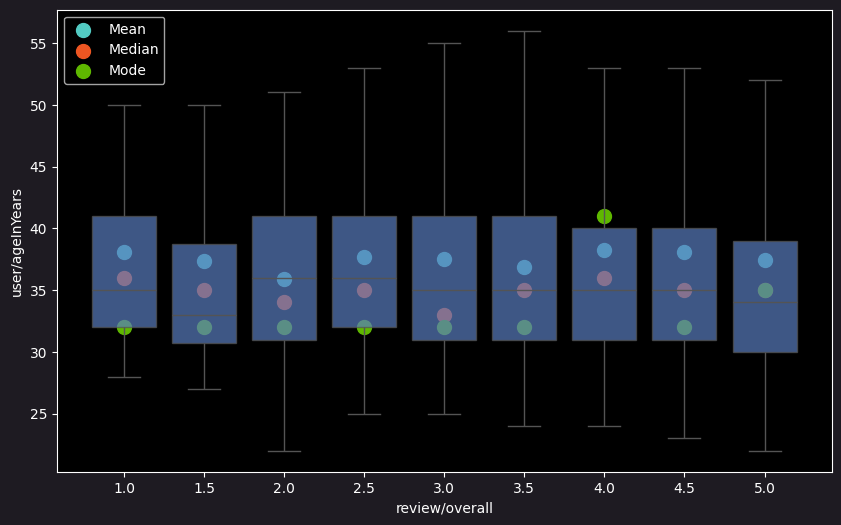

In [207]:
# We remove any missing values from the data
df_age_filtered = df[(df['user/ageInYears'] > 0) & (df['user/ageInYears'].notna())]

plt.style.use('dark_background')
sns.set_palette("muted")
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor("#1E1B22")  # Set background to #1E1B22
sns.boxplot(x="review/overall", y="user/ageInYears", data=df_age_filtered, showfliers=False, boxprops=dict(alpha=0.7))
for category in df_age_filtered['review/overall'].unique():
    subset = df_age_filtered[df_age_filtered['review/overall'] == category]['user/ageInYears']
    mean = subset.mean()
    median = subset.median()
    mode = subset.mode()[0]
    x_position = list(df_age_filtered['review/overall'].unique()).index(category)
    plt.scatter(x_position, mean, color='#52CBC3', s=100, label='Mean' if category == df_age_filtered['review/overall'].unique()[0] else "")
    plt.scatter(x_position, median, color='#EE5622', s=100, label='Median' if category == df_age_filtered['review/overall'].unique()[0] else "")
    plt.scatter(x_position, mode, color='#5FB800', s=100, label='Mode' if category == df_age_filtered['review/overall'].unique()[0] else "")
plt.legend()
plt.show()

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left">
            We observe that the the central tendency mostly lies withing the IQR(Inter Quartile Range). It suggests that the data is relatively symmetric, with most of the data points falling within the middle 50% of the distribution. This is a good sign for the data, as it indicates that the data is not skewed towards any particular direction w.r.t our target variable. So we can safely impute the missing values using median.
        </p>
    </div>
</center>

In [208]:
df['user/ageInYears'] = df['user/ageInYears'].fillna(df['user/ageInYears'].median())

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-decoration:underline">
        Handling missing user/gender data.
        </p>
        <p style="text-align:left">Let's take a look at the current distribution.</p>
    </div>
</center>

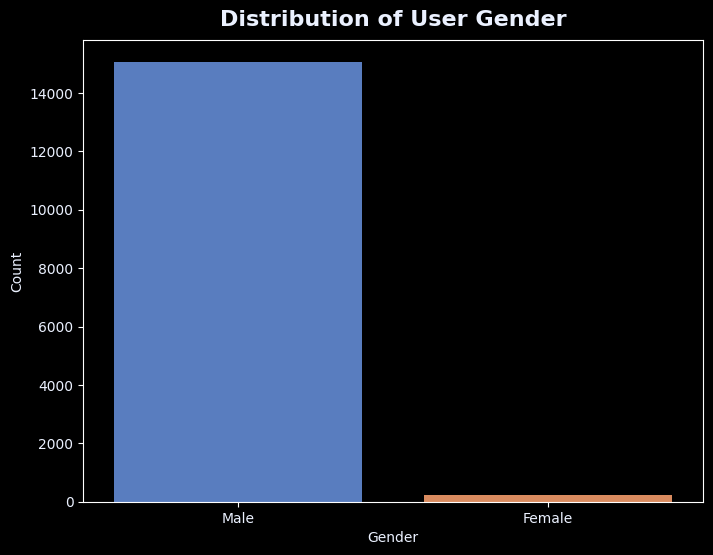

In [209]:
plt.figure(figsize=(8, 6))
sns.countplot(x="user/gender", hue="user/gender", data=df, palette="muted", legend=False)
plt.title("Distribution of User Gender", fontsize=16, fontweight="bold", pad=10, color="#ebf1ff")
plt.xlabel(color="#ebf1ff",xlabel="Gender")
plt.ylabel(color="#ebf1ff",ylabel="Count")
plt.xticks(color='#ebf1ff') 
plt.yticks(color='#ebf1ff')
plt.show()

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left">The current distribution of the user/gender column is highly imbalanced, with over 15,000 entries for Male and only 245 entries for Female. To mitigate bias during model training, it is essential to assign appropriate class weights to the Female gender to ensure the model does not favor the Male gender. Regarding the missing data, imputing the mode of the distribution would be a reasonable approach to handle the gaps.
</p>
    </div>
</center>

In [210]:
df['user/gender'] = df['user/gender'].fillna(df['user/gender'].mode()[0])

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-decoration:underline">
        Handling missing user/profileName and review/text data and other cleaning tasks.
        </p>
        <p style="text-align:left">We can drop the user/profileName column all toghether, along with user/birthdayRaw and user/birthdatUnix. We can remove the rows with missing review/text data</p>
    </div>
</center>

In [211]:
df = df.drop(columns=['user/profileName', 'user/birthdayRaw', 'user/birthdayUnix', 'user/ageInSeconds'])
df = df.dropna(subset=['review/text'])

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-decoration:underline">
        Checking for duplicate records in the dataset
        </p>
    </div>
</center>

In [212]:
print(df.duplicated().sum())

0


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-decoration:underline">
        Outlier Detection and Removal
        </p>
        <p style="text-align:left;">Identifying outliers in numerical data is essential for ensuring the accuracy and performance of the model. We will remove these outliers as they do not accurately represent the underlying data distribution and could potentially distort the model's predictions.</p>
    </div>
</center>

In [213]:
Q1_ABV = df['beer/ABV'].quantile(0.25)
Q3_ABV = df['beer/ABV'].quantile(0.75)
IQR_ABV = Q3_ABV - Q1_ABV

df_final = df[(df['beer/ABV'] >= (Q1_ABV - 1.5 * IQR_ABV)) & (df['beer/ABV'] <= (Q3_ABV + 1.5 * IQR_ABV))]


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left;">Removing any trainling spaces and mismatched case formats to ensure data consistency in string data</p>
    </div>
</center>

In [214]:
df_final.loc[:, 'user/gender'] = df['user/gender'].str.strip().str.lower()
df_final.loc[:, 'beer/style'] = df['beer/style'].str.strip().str.lower()
df_final.loc[:, 'review/text'] = df['review/text'].str.strip().str.lower()

<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 240px; width: max-content; border-radius: 12px">Feature Engineering</h2>
  </center>
</div>

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left;">
            Sentiment Analysis: We can use NLP to analyze the sentiment of a text. This can be useful in converting the review/text data into a numerical value that can be used in machine learning models.
        </p>
    </div>
</center>

In [215]:
nlp = spacy.load('en_core_web_sm')
def get_sentiment(text):
    doc = nlp(text)
    blob = TextBlob(doc.text)
    return blob.sentiment.polarity

sentiments = []
batch_size = 100

# takes around 20 minutes, time for coffee is now
for i in tqdm(range(0, len(df_final), batch_size)):
    batch_end = min(i + batch_size, len(df_final))
    sentiments.extend(df_final['review/text'][i:batch_end].apply(get_sentiment))

df_final.loc[:, 'review_sentiment'] = sentiments

100%|██████████| 375/375 [20:41<00:00,  3.31s/it]
C:\Users\nodeX\AppData\Local\Temp\ipykernel_9016\562841734.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'review_sentiment'] = sentiments


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left;">
            Extract Month and Year: We might be able to derive meaningful insights from the data by extracting the month and year from the date field. While this is a long shot, the assertion here is that beer, which is a product that is consumed on occasions, might have a seasonal pattern and month of the year might impact how positive the review is. This could be a good starting point for further analysis.
        </p>
    </div>
</center>

In [216]:
df_final = df_final.copy()

df_final.loc[:, 'review/timeStruct'] = df_final['review/timeStruct'].apply(ast.literal_eval)

def convert_to_datetime(time_struct):
    if isinstance(time_struct, dict):
        minute = time_struct.get('min', 0)
        hour = time_struct.get('hour', 0)
        day = time_struct.get('mday', 1)
        second = time_struct.get('sec', 0)
        year = time_struct.get('year', 1970)
        month = time_struct.get('mon', 1)
        return datetime.datetime(year, month, day, hour, minute, second)
    else:
        return None
df_final.loc[:, 'review/datetime'] = df_final['review/timeStruct'].apply(convert_to_datetime)
df_final = df_final.drop(columns=['review/timeStruct','review/timeUnix', 'index'])

In [3]:
df_final = pd.read_csv("./out/dataset.csv")

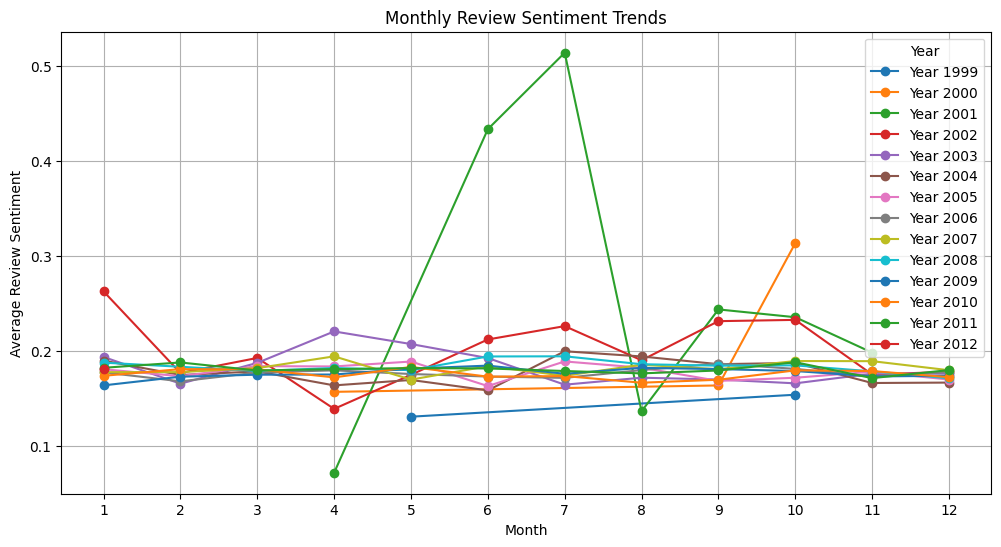

In [4]:
df_final['review/month'] = pd.to_datetime(df_final['review/datetime']).dt.month
df_final['review/year'] = pd.to_datetime(df_final['review/datetime']).dt.year
grouped = df_final.groupby(['review/year', 'review/month'])['review_sentiment'].mean().reset_index()

plt.figure(figsize=(12, 6))
for year in grouped['review/year'].unique():
    year_data = grouped[grouped['review/year'] == year]
    plt.plot(year_data['review/month'], year_data['review_sentiment'], marker='o', label=f'Year {year}')

plt.title('Monthly Review Sentiment Trends')
plt.xlabel('Month')
plt.ylabel('Average Review Sentiment')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left;">
            It show there are no clear seasonal trends across all years. There are some noticeable outliers. These might indicate special events or data anomalies for those periods.
        </p>
        <p style="text-align:left;">In any case, we will have to drop these newly created dimensions</p>
    </div>
</center>

In [5]:
df_final=df_final.drop(columns=['Unnamed: 0','review/datetime','review/month','review/year'])

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left;">
            Create Age Groups: We can create age groups based on user/ageInYears data. This will help us indentify the positivity of reviews per age groups which can be beneficial for the business to understand the age demographics of their customers and which age group to market their products.
        </p>
    </div>
</center>

In [6]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df_final['user/ageGroup'] = pd.cut(df_final['user/ageInYears'], bins=bins, labels=labels)

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left;">
            Popularity Score: We can calculate the popularity of the beer by the name and style of the beer grouped according to the reviews received.
        </p>
    </div>
</center>

In [7]:
df_final['beer_popularity'] = df_final.groupby('beer/name')['review/overall'].transform('mean')
df_final['style_avg_rating'] = df_final.groupby('beer/style')['review/overall'].transform('mean')

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left;">
            Clustering: Clulstering can help us extract patterns from the data. It can be used to group similar data points together. This can be useful in identifying outliers or anomalies in the data.
        </p>
    </div>
</center>

In [8]:
features = ['beer/ABV', 'review/appearance', 'review/aroma', 
            'review/palate', 'review/taste', 'review_sentiment',
            'user/ageInYears','beer_popularity', 'style_avg_rating']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final[features])


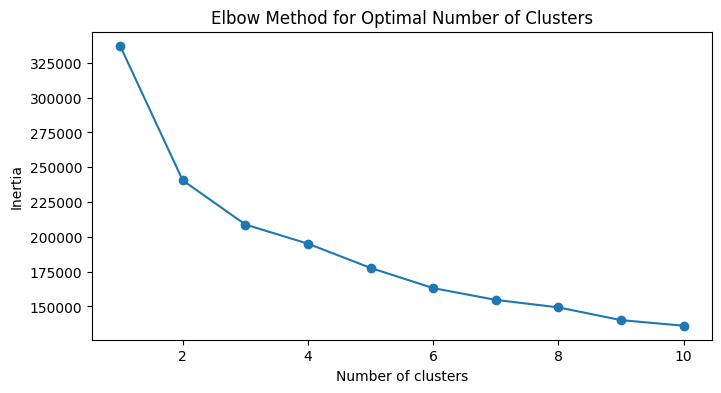

In [9]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [10]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_final['kmeans_cluster'] = clusters

print(df_final['kmeans_cluster'].value_counts())


kmeans_cluster
0    17104
1    16122
2     4252
Name: count, dtype: int64


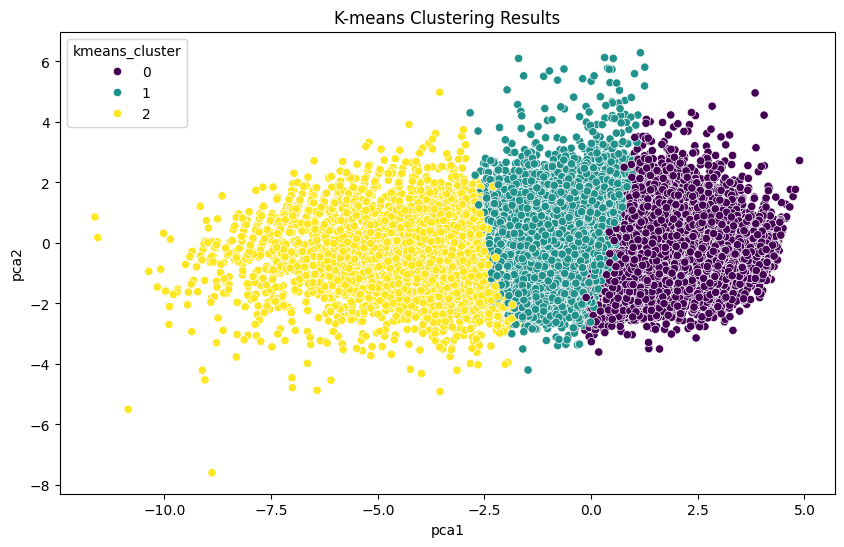

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_final['pca1'] = principal_components[:, 0]
df_final['pca2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='pca1', y='pca2', hue='kmeans_cluster', palette='viridis')
plt.title('K-means Clustering Results')
plt.show()
df_final = df_final.drop(columns=['pca1','pca2'])


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left;">
            Let us observe the correlation matrix for the given data. The correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The correlation coefficient ranges from -1 to 1. A value of 1 means a perfect positive correlation, -1 means a perfect negative correlation, and 0 means no correlation. The correlation matrix is a symmetric matrix, meaning that the correlation between variable A and variabl B is the same as the correlation between variable B and variable A. The correlation matrix is a useful tool for understanding the relationships between variables in a dataset. It can help identify patterns and relationships that may not be immediately apparent from looking at the data itself. The correlation matrix can also be used to identify correlations between variables that are not directly related to each other.
        </p>
    </div>
</center>

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37478 entries, 0 to 37477
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   beer/ABV           37478 non-null  float64 
 1   beer/beerId        37478 non-null  int64   
 2   beer/brewerId      37478 non-null  int64   
 3   beer/name          37478 non-null  int64   
 4   beer/style         37478 non-null  int64   
 5   review/appearance  37478 non-null  float64 
 6   review/aroma       37478 non-null  float64 
 7   review/overall     37478 non-null  float64 
 8   review/palate      37478 non-null  float64 
 9   review/taste       37478 non-null  float64 
 10  review/text        37478 non-null  object  
 11  user/gender        37478 non-null  int64   
 12  user/ageInYears    37478 non-null  float64 
 13  review_sentiment   37478 non-null  float64 
 14  user/ageGroup      37478 non-null  category
 15  beer_popularity    37478 non-null  float64 
 16  styl

<Axes: >

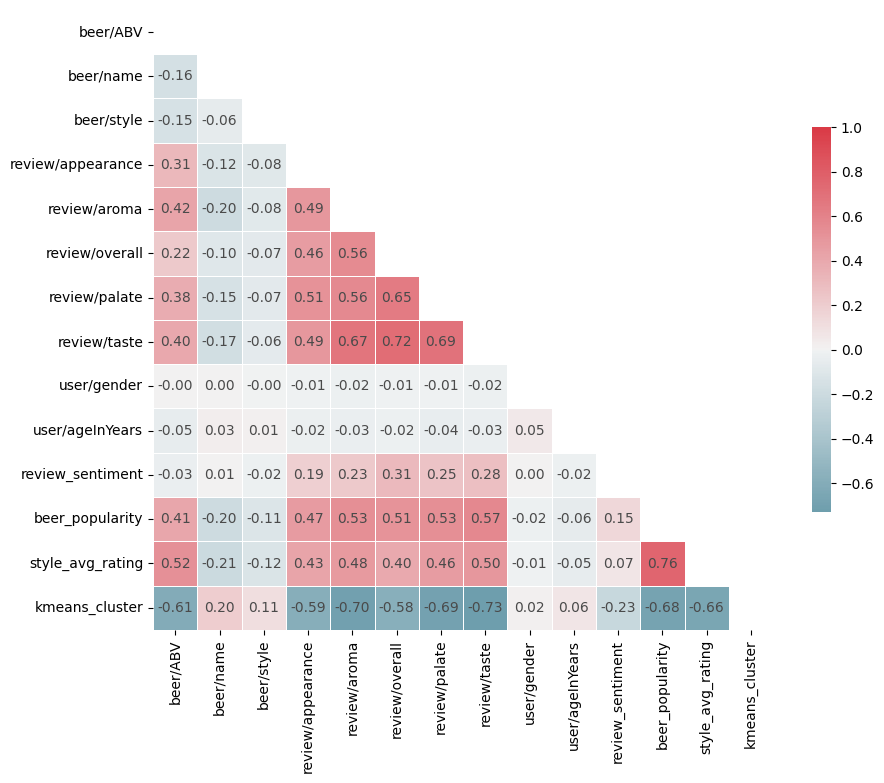

In [14]:
df_corr = df_final.drop(columns=['beer/beerId', 'beer/brewerId', 'review/text', 'user/ageGroup'])
corr = df_corr.corr(method='spearman')
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending=False)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,annot_kws={"fontsize": 10, "color": "#4a4a4a", "ha": "center", "va": "center"}, fmt=".2f")


- Strong Positive Correlations: Review aspects like taste, aroma, palate, and overall rating are strongly correlated, indicating these factors closely influence beer ratings.

- Moderate Positive Correlations: Higher alcohol content (ABV) moderately influences review appearance and aroma, while beer popularity is moderately correlated with review aspects such as taste.

- Weak or No Correlations: User demographics such as gender and age show weak or no significant correlations with most other variables, suggesting minimal impact on review aspects.

- Review Sentiment: The sentiment of a review is moderately correlated with overall ratings and specific aspects of the beer, highlighting the connection between user experience and ratings.

<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 240px; width: max-content; border-radius: 12px">Data Preprocessing</h2>
  </center>
</div>

In [15]:
label_encoder = LabelEncoder()
object_columns = ['beer/name', 'beer/style', 'user/gender']
for col in object_columns:
    df_final[col] = label_encoder.fit_transform(df_final[col])
df_final['user/ageGroup'] = df_final['user/ageGroup'].cat.codes

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37478 entries, 0 to 37477
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer/ABV           37478 non-null  float64
 1   beer/beerId        37478 non-null  int64  
 2   beer/brewerId      37478 non-null  int64  
 3   beer/name          37478 non-null  int64  
 4   beer/style         37478 non-null  int64  
 5   review/appearance  37478 non-null  float64
 6   review/aroma       37478 non-null  float64
 7   review/overall     37478 non-null  float64
 8   review/palate      37478 non-null  float64
 9   review/taste       37478 non-null  float64
 10  review/text        37478 non-null  object 
 11  user/gender        37478 non-null  int64  
 12  user/ageInYears    37478 non-null  float64
 13  review_sentiment   37478 non-null  float64
 14  user/ageGroup      37478 non-null  int8   
 15  beer_popularity    37478 non-null  float64
 16  style_avg_rating   374

In [17]:
# df_final.to_csv('./out/dataset.csv')

<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 240px; width: max-content; border-radius: 12px">Model Building</h2>
  </center>
</div>

In [18]:
X = df_corr.drop(columns=['review/overall'])
y = df_corr['review/overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 120px; width: max-content; border-radius: 12px; font-size:18px">Linear Regression</h2>
  </center>
</div>

In [19]:
# Initialize and train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Evaluation
        </p>
    </div>
</center>

In [20]:
# Make predictions on test data
y_pred = linear_reg.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.15753418051376486
R-squared: 0.6799349313901497


<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 120px; width: max-content; border-radius: 12px; font-size:18px">Random Forest</h2>
  </center>
</div>

In [21]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Evaluation
        </p>
    </div>
</center>

In [22]:
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest Mean Squared Error: 0.17108692991207178
Random Forest R-squared: 0.652399563180695


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Hyperparameter Tuning
        </p>
    </div>
</center>

In [23]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), 
                               param_distributions=param_grid, 
                               n_iter=50, 
                               cv=3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs=-1)


In [24]:
rf_random.fit(X_train, y_train)
best_params = rf_random.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}


In [25]:
rf_reg = RandomForestRegressor(n_estimators=300,min_samples_split=2, min_samples_leaf=1,max_features='sqrt',max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [26]:
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest Mean Squared Error: 0.15508078250948454
Random Forest R-squared: 0.6849195448753396


<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 120px; width: max-content; border-radius: 12px; font-size:18px">Gradient Boosting Regressor</h2>
    <p>We shall proceed with hyperparameter tuning to save time and resources</p>
  </center>
</div>

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}
gbr_random = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                                param_distributions=param_grid, 
                                n_iter=50, 
                                cv=3, 
                                verbose=2, 
                                random_state=42, 
                                n_jobs=-1)


In [28]:
gbr_random.fit(X_train, y_train)
best_params_gbr = gbr_random.best_params_
print("Best Hyperparameters:", best_params_gbr)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\nodeX\miniconda3\envs\tf\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.1}


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Evaluation
        </p>
    </div>
</center>

In [29]:
best_gbr = gbr_random.best_estimator_
y_pred_best_gbr = best_gbr.predict(X_test)
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)
print("Tuned Gradient Boosting Mean Squared Error:", mse_best_gbr)
print("Tuned Gradient Boosting R-squared:", r2_best_gbr)

Tuned Gradient Boosting Mean Squared Error: 0.15186076872808021
Tuned Gradient Boosting R-squared: 0.6914617056210819


<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 120px; width: max-content; border-radius: 12px; font-size:18px">XGBoost</h2>
  </center>
</div>

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_random = RandomizedSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                                param_distributions=param_grid,
                                n_iter=50,
                                cv=3,
                                verbose=2,
                                random_state=42,
                                n_jobs=-1)

In [31]:
xgb_random.fit(X_train, y_train)
best_params_xgb = xgb_random.best_params_
print("Best Hyperparameters:", best_params_xgb)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Evaluation
        </p>
    </div>
</center>

In [32]:
best_xgb = xgb_random.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print("Tuned XGBoost Mean Squared Error:", mse_best_xgb)
print("Tuned XGBoost R-squared:", r2_best_xgb)


Tuned XGBoost Mean Squared Error: 0.15113003838417233
Tuned XGBoost R-squared: 0.6929463437922738


<div style="color:#ebf1ff; padding: 10px;">
  <center>
    <h2 style="background-color: #0E182F; padding: 12px 120px; width: max-content; border-radius: 12px; font-size:18px">H2O.ai</h2>
  </center>
  <ul style="text-align:left;">
    <li>H2O.ai is a leading open-source AI platform that focuses on machine learning and AI solutions.</li>
    <li>H2O-3: An open-source, distributed, in-memory machine learning platform supporting various algorithms like gradient boosting, deep learning, and generalized linear models. It's widely popular in both R and Python communities.</li>
    <li>H2O AutoML: An automatic machine learning tool that runs through different algorithms and their hyperparameters. It simplifies the process of training and evaluating machine learning models.</li>
  </ul>
  <p>We will use H2O.ai AutoML to automate the machine learning process and find the best model for our dataset. This will save us time and effort in model selection and hyperparameter tuning. Make sure the system has java runtime installed for H2o.ai server to work.</p>
</div>

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Starting the Server
        </p>
    </div>
</center>

In [38]:
h2o.init(ip='localhost',max_mem_size='8G', port=3000)

Checking whether there is an H2O instance running at http://localhost:3000..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.431-b10, mixed mode)
  Starting server from C:\Users\nodeX\miniconda3\envs\tf\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\nodeX\AppData\Local\Temp\tmphaqz8kdp
  JVM stdout: C:\Users\nodeX\AppData\Local\Temp\tmphaqz8kdp\h2o_nodeX_started_from_python.out
  JVM stderr: C:\Users\nodeX\AppData\Local\Temp\tmphaqz8kdp\h2o_nodeX_started_from_python.err
  Server is running at http://127.0.0.1:3000
Connecting to H2O server at http://127.0.0.1:3000 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 17 days
H2O_cluster_name:,H2O_from_python_nodeX_3ho1dl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.104 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Data Loading
        </p>
    </div>
</center>

In [44]:
h2o_df = h2o.H2OFrame(df_corr)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
h2o_df

beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/gender,user/ageInYears,review_sentiment,beer_popularity,style_avg_rating,kmeans_cluster
5,368,60,4,4,4,4,4,1,35,-0.0170139,3.67647,3.45161,1
11,153,4,4,3.5,3.5,3.5,3,1,35,0.124208,3.66393,3.8888,1
4.7,1043,14,3.5,4,3.5,3.5,3.5,1,35,0.241389,3.63462,3.80158,1
4.4,1173,35,3,3,2.5,3,3,1,38,0.272917,3.8351,3.7792,1
4.4,230,45,4,3,3,3.5,2.5,1,35,0.292449,3.87103,3.60556,1
10,1666,80,4,4,4,4,4.5,1,35,0.0662879,3.94444,4.16773,0
12.6,167,20,4,4.5,4,4,4,1,35,0.10588,4.18421,4.04,0
8.4,671,77,4,4,4,4,4,1,35,0.266295,3.70144,3.7619,1
9,1399,40,4.5,4,4.5,4.5,4.5,1,35,0.104023,4.18966,4.23333,0
6.2,1118,12,2,2,2,2.5,2,1,35,-0.105317,3,4.04462,2


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Model Building
        </p>
    </div>
</center>

In [46]:
train, test = h2o_df.split_frame(ratios=[0.8], seed=1331)

In [47]:
target = 'review/overall'
aml = H2OAutoML(max_runtime_secs=60,
                sort_metric='RMSE')

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         AutoML Training
        </p>
    </div>
</center>

In [48]:
aml.train(y=target, training_frame=train, leaderboard_frame=test)

AutoML progress: |
07:41:50.582: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/22
# GBM base models (used / total),4/14
# DeepLearning base models (used / total),2/5
# GLM base models (used / total),0/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [49]:
lb = aml.leaderboard
print(lb.head())

model_id                                                    rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20250119_74150     0.388259  0.150745  0.298538  0.0869639                  0.150745
StackedEnsemble_BestOfFamily_4_AutoML_1_20250119_74150  0.388353  0.150818  0.298495  0.0869782                  0.150818
GBM_grid_1_AutoML_1_20250119_74150_model_2              0.388534  0.150959  0.298803  0.0871242                  0.150959
GBM_grid_1_AutoML_1_20250119_74150_model_3              0.389357  0.151599  0.299758  0.0871935                  0.151599
StackedEnsemble_AllModels_2_AutoML_1_20250119_74150     0.389532  0.151735  0.299448  0.0871915                  0.151735
StackedEnsemble_BestOfFamily_3_AutoML_1_20250119_74150  0.389563  0.151759  0.299313  0.0872057                  0.151759
StackedEnsemble_BestOfFamily_1_AutoML_1_20250119_74150  0.389723  0.151884  0.300814  0.087231                   0.151884
StackedEnsemble_BestOfFa

In [50]:
best_model = aml.leader
predictions = best_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [51]:
target = 'review/overall'
actuals = test[target].as_data_frame().reset_index(drop=True)
predictions_df = predictions.as_data_frame().reset_index(drop=True)
results = pd.concat([actuals, predictions_df], axis=1)
results.columns = ['Actual', 'Predicted']
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
actuals_np = results['Actual'].values
predicted_np = results['Predicted'].values

mse = mean_squared_error(actuals_np, predicted_np)
mae = mean_absolute_error(actuals_np, predicted_np)
rmse = mse ** 0.5
r2 = r2_score(actuals_np, predicted_np)

c:\Users\nodeX\miniconda3\envs\tf\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\nodeX\miniconda3\envs\tf\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Evaluation
        </p>
    </div>
</center>

In [52]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.15074490481477137
Mean Absolute Error (MAE): 0.2985384973474901
Root Mean Squared Error (RMSE): 0.3882588116382826
R-squared (R2): 0.6898802625037195


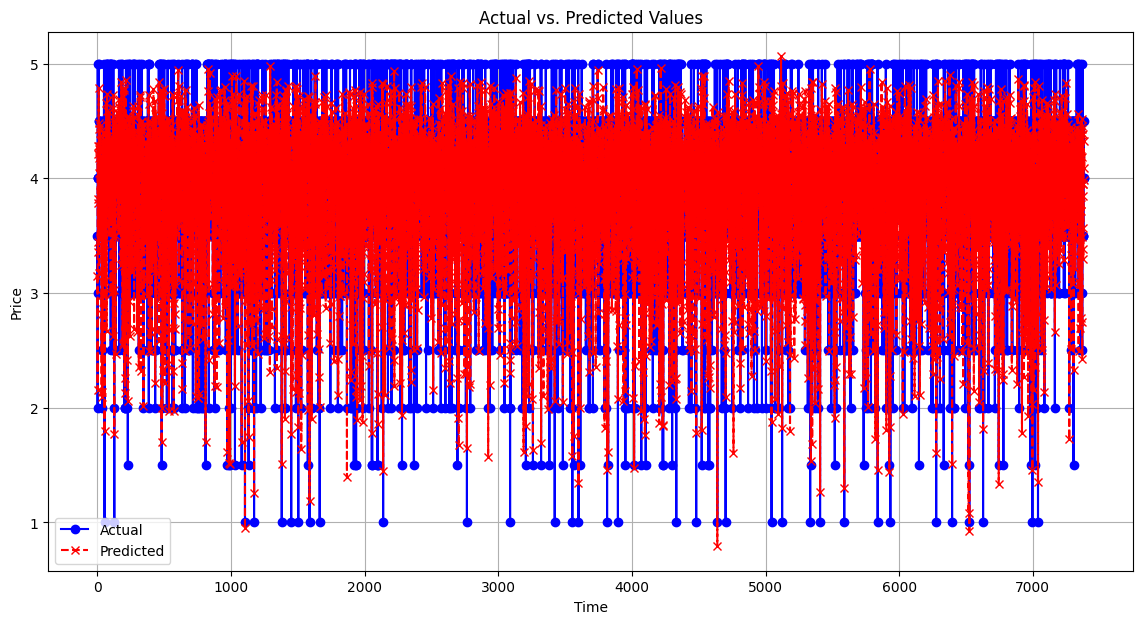

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(results['Actual'], label='Actual', color='blue', linestyle='-', marker='o')

plt.plot(results['Predicted'], label='Predicted', color='red', linestyle='--', marker='x')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
    <div style="color:#ebf1ff; padding: 10px;">
        <h2 style="background-color: #0E182F; padding: 12px 240px; width: max-content; border-radius: 12px">Conclusions</h2>
    </div>
        <p style="text-align:left">In this project, we aimed to predict the overall beer review scores using various machine learning models and feature engineering techniques. After thorough data preprocessing, we implemented several models, including Linear Regression, Gradient Boosting, XGBoost, and H2O AutoML. Our best-performing models consistently achieved an R-squared value in the range of 0.68 to 0.69.</p>
    <div style="color:#ebf1ff; padding: 10px;">
        <h2 style="background-color: #0E182F; padding: 12px 120px; width: max-content; border-radius: 12px; font-size:18px">Key Findings</h2>
    </div>
        <ul style="text-align:left">
            <li><b>Feature Importance</b>: Features like review components (appearance, aroma, palate, taste) and user demographics play significant roles in predicting overall beer reviews.</li>
            <li><b>Model Performance</b>: Non-linear models such as Gradient Boosting and XGBoost demonstrated their ability to capture complex relationships within the data, albeit with similar performance metrics to linear models.</li>
            <li><b>Clustering Insights</b>: Using clustering algorithms like K-means and DBSCAN(removed due to bad clustering) revealed distinct patterns and helped us engineer additional features that improved model accuracy.</li>
        </ul>
    <div style="color:#ebf1ff; padding: 10px;">
        <h2 style="background-color: #0E182F; padding: 12px 120px; width: max-content; border-radius: 12px; font-size:18px">Future Work</h2>
    </div> 
        <div style="display:grid;grid-template-columns: 50% 30%; justify-content:center; align-items:center;">
            <ul style="text-align:left">
                <li><b>Enhanced Feature Engineering</b>: Creating interaction and polynomial features could further improve model performance by capturing more nuanced relationships.</li>
                <li><b>Advanced Hyperparameter Tuning</b>: Using Bayesian optimization techniques like Optuna or Hyperopt could help fine-tune models further and achieve better predictions.</li>
                <li><b>Neural Networks</b>: Exploring deep learning architectures might offer additional performance gains, especially for capturing non-linear patterns in the data.</li>
                <li><b>Ensemble Methods</b>: Combining the strengths of multiple models through stacking and blending could lead to more robust and accurate predictions.</li>
            </ul>
            <img src="./assets/conclusion.png" alt="" style="width:100%"/>
        </div>
    </div>
</center>

<center>
    <div style="background-color: #1E1B22; padding: 12px; border-radius: 12px; width: 94%">
        <p style="text-align:left; text-decoration: underline;">
         Exporting models
        </p>
    </div>
</center>

In [54]:
import joblib

In [60]:
joblib.dump(linear_reg, './models/Linear Regression/linear_regression_model.pkl')
joblib.dump(rf_reg, './models/Random Forest/random_forest_regressor.pkl')
joblib.dump(best_gbr, './models/GBR/gradient_boosting_regressor.pkl')
joblib.dump(best_xgb, './models/XGB/xgboost.pkl')
h2o.save_model(model=best_model, path="./models/AutoML/", force=True)


'C:\\Users\\nodeX\\Documents\\MachineLearning2k25\\DS_Case_Study_beer-ratings_2020\\models\\AutoML\\StackedEnsemble_AllModels_3_AutoML_1_20250119_74150'